# Optimization algorithms

### 1. Gradient descent
------------------------------------------
* Derived from taylor expansion
* $x \leftarrow x - \eta \cdot f'(x)$ where $\eta$ is the learning rate.

In [1]:
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt  

In [2]:
def f(x):
    return x**2

def f_deriv(x):
    return 2*x

def gradient_descent(eta, f_deriv):
    x = 10
    results = [x]
    for i in range(10):
        x = x -eta*f_deriv(x)
        results.append(float(x))
    print(f'epoch 10, x:{x:f}')
    return results
results = gradient_descent(0.1, f_deriv)

epoch 10, x:1.073742


Lets visualize the progress of optimizing over x

In [3]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    plt.figure(figsize=(3, 3))
    plt.plot(f_line, [f(x) for x in f_line], label="f(x)")
    plt.plot(results, [f(x) for x in results], '-o', label="trajectory")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

epoch 10, x:0.060466


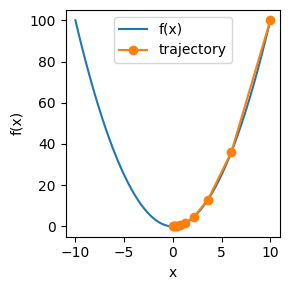

In [4]:
show_trace(gradient_descent(0.2,f_deriv), f)


### Consequences of learning rate

epoch 10, x:3.486784


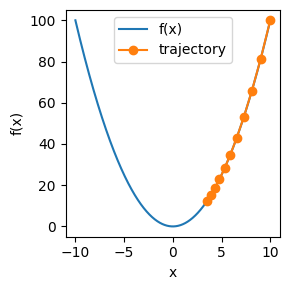

In [5]:
show_trace(gradient_descent(0.05,f_deriv), f)

epoch 10, x:44.114351


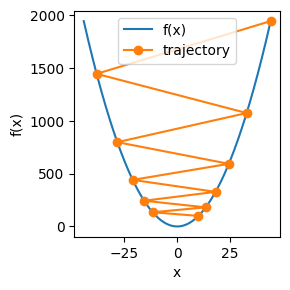

In [9]:
show_trace(gradient_descent(1.08,f_deriv), f)

### Non convex functins

epoch 10, x:4.804714


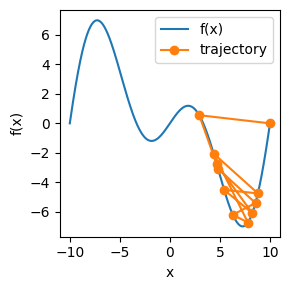

In [12]:
c = torch.tensor(0.15 * np.pi)
def f(x): 
    return x * torch.cos(c * x)
def f_grad(x): 
    return torch.cos(c * x) - c * x * torch.sin(c * x)
show_trace(gradient_descent(1.5, f_grad), f)

## 2. Newton's method
--------------------------------

* Taylor expansion up to second term
* Use Hesian matrix
* Update formula is the same as previous 

epoch 10, x: tensor(0.)


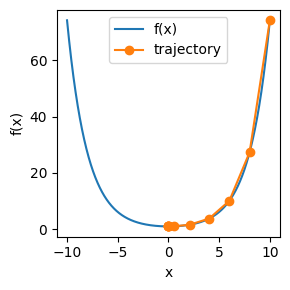

In [13]:
c = torch.tensor(0.5)
def f(x): 
    return torch.cosh(c * x)
def f_grad(x): 
    return c * torch.sinh(c * x)

def f_hess(x): 
    return c**2 * torch.cosh(c * x)
def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(), f)

## Stochastic Gradient Descent

Adam

In [14]:
def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * s + (1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)
            + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1